In [24]:
## Import necessary Libraries
import itertools
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report


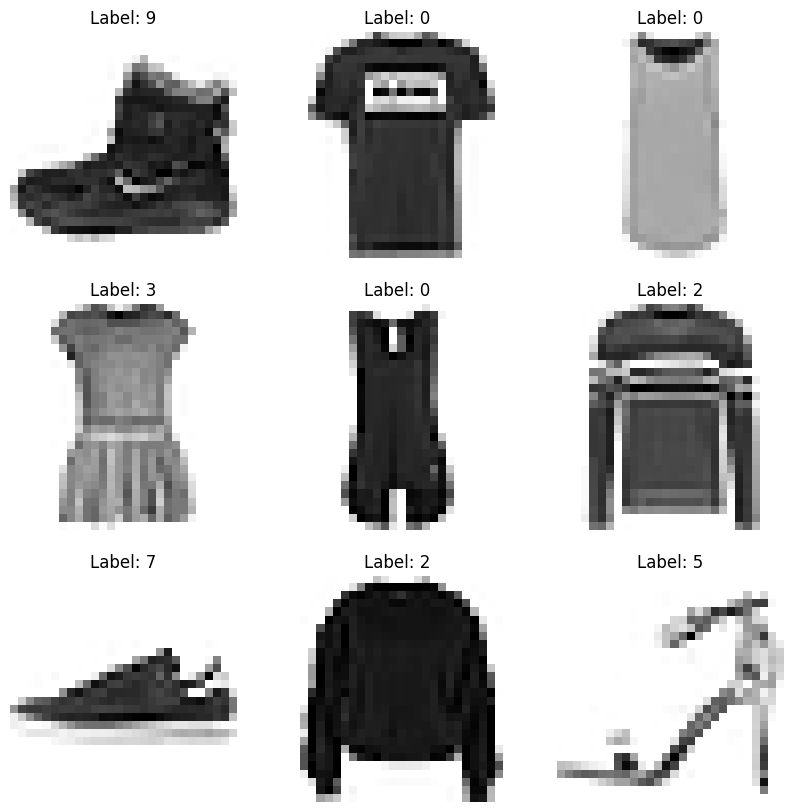

In [16]:
##Load and visualize the dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Visualize the first few training samples
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_data[i], cmap='binary')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis(False)


In [17]:
##Check dataset shapes and normalize

print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

# Normalize the data
train_data = train_data / 255.0
test_data = test_data / 255.0


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [18]:
## Define helper functions for visualization
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels,  # axes will be labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

def plot_random_image(model, images, true_labels, classes):
    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))  # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color)  # set the color to green or red


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


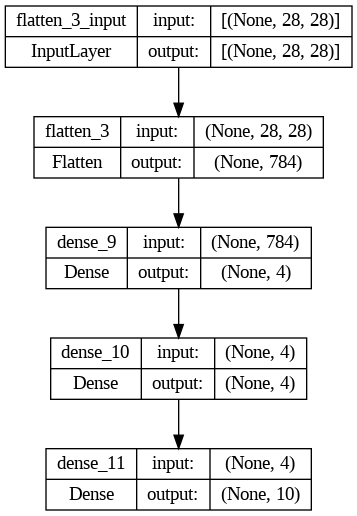

In [19]:
## Build the model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.summary()
plot_model(model, show_shapes=True)


Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2298 - accuracy: 0.5158 - val_loss: 0.9140 - val_accuracy: 0.6217 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8368 - accuracy: 0.6824 - val_loss: 0.8106 - val_accuracy: 0.7067 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7372 - accuracy: 0.7395 - val_loss: 0.7292 - val_accuracy: 0.7474 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.7577 - val_loss: 0.7007 - val_accuracy: 0.7560 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6723 - accuracy: 0.7649 - val_loss: 0.6920 - val_accuracy: 0.7554 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6594 - accuracy: 0.7707 - val_loss: 0.6987 - val_accuracy: 0.7577 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

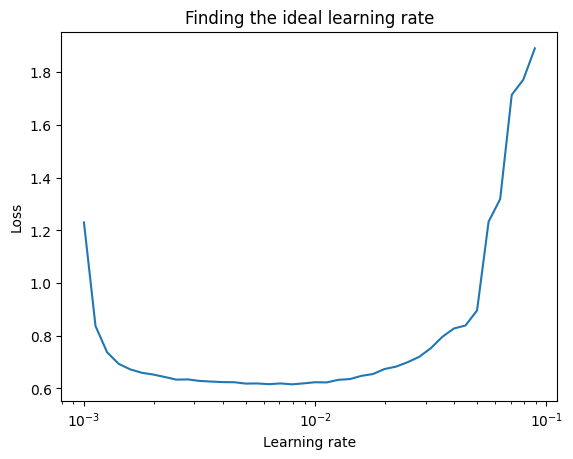

In [20]:
## Find the ideal learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [21]:
## Train the model with the ideal learning rate
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2102 - accuracy: 0.5380 - val_loss: 0.9395 - val_accuracy: 0.6504
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8588 - accuracy: 0.6779 - val_loss: 0.8182 - val_accuracy: 0.6917
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7677 - accuracy: 0.6999 - val_loss: 0.7478 - val_accuracy: 0.7150
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6985 - accuracy: 0.7382 - val_loss: 0.6757 - val_accuracy: 0.7688
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6222 - accuracy: 0.7873 - val_loss: 0.6303 - val_accuracy: 0.7860
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5899 - accuracy: 0.7951 - val_loss: 0.6340 - val_accuracy: 0.7803
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5743 - accuracy: 0.7983 - val_loss: 0.6530 - val_accuracy:

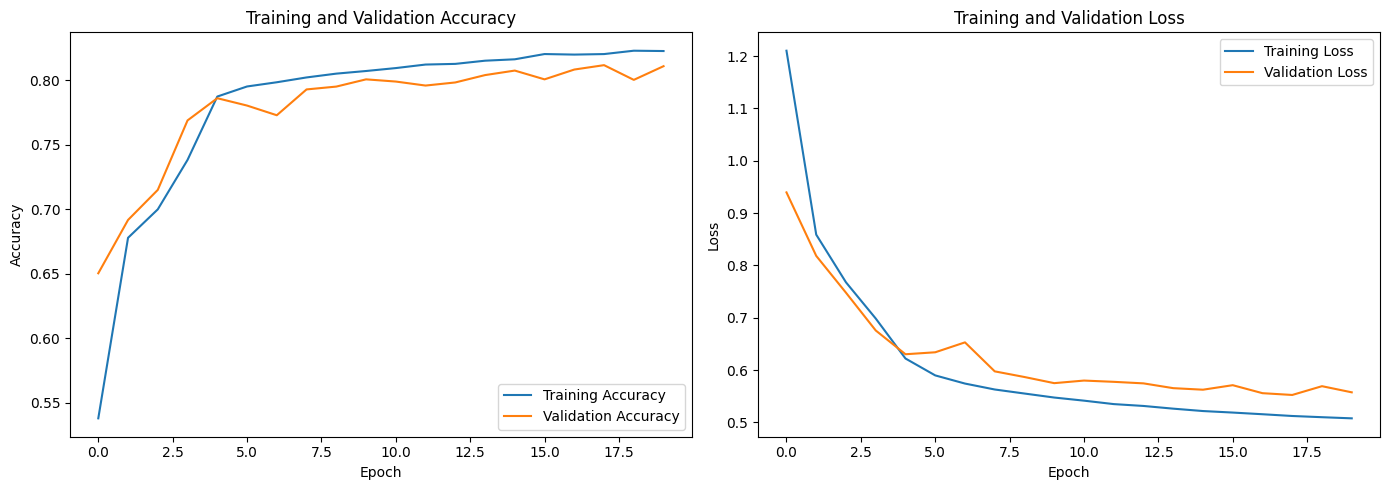

313/313 [==============================] - 0s 1ms/step


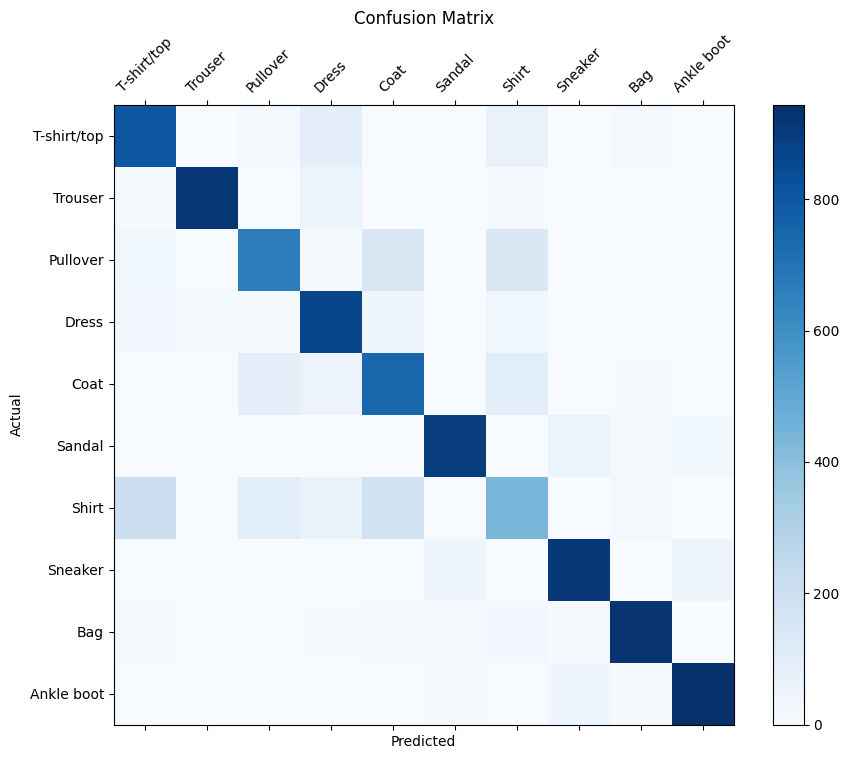

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.73      0.80      0.76      1000
     Trouser       0.98      0.92      0.95      1000
    Pullover       0.74      0.67      0.70      1000
       Dress       0.75      0.86      0.80      1000
        Coat       0.66      0.75      0.70      1000
      Sandal       0.94      0.90      0.91      1000
       Shirt       0.54      0.44      0.48      1000
     Sneaker       0.91      0.91      0.91      1000
         Bag       0.93      0.92      0.93      1000
  Ankle boot       0.92      0.94      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

1/1 [==============================] - 0s 23ms/step


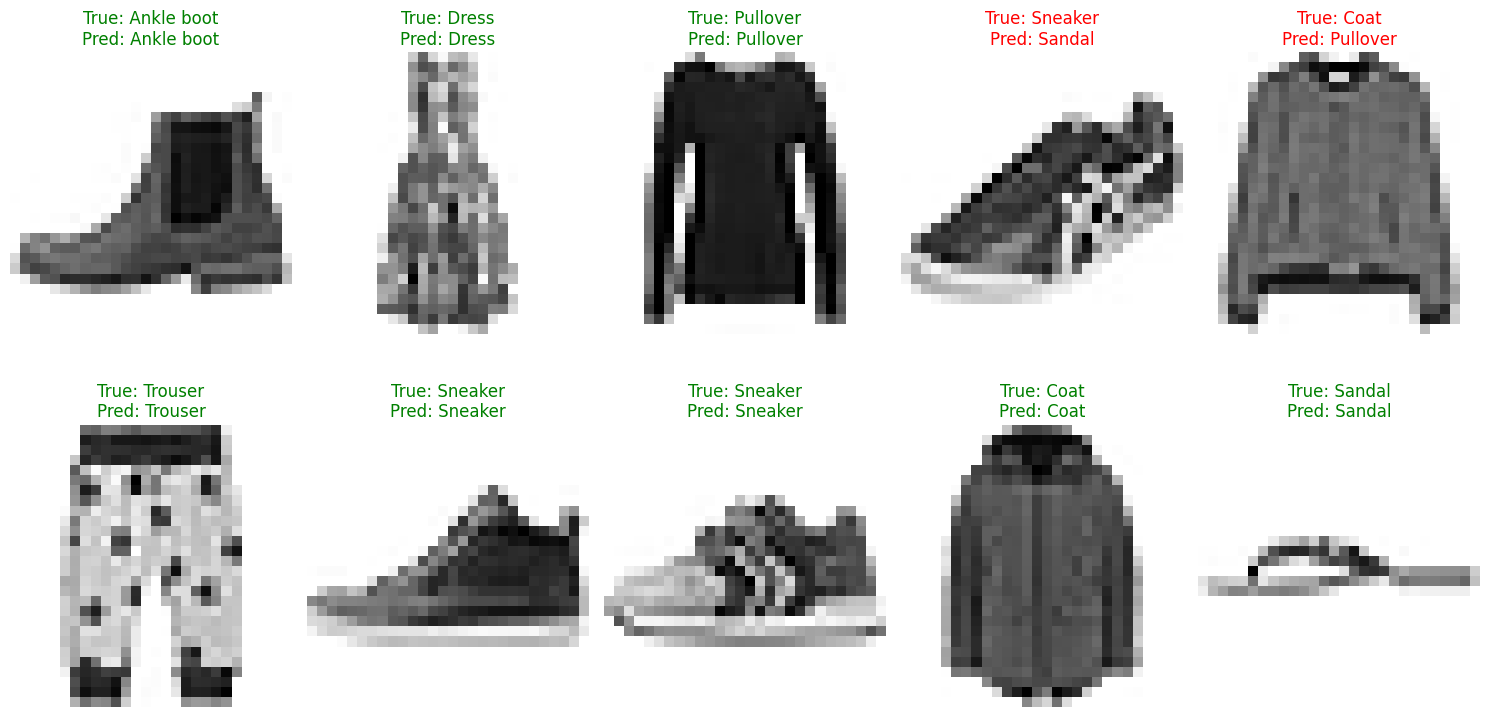

In [25]:
## Visualize results

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1. Plot training history
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Confusion Matrix
y_probs = model.predict(test_data)
y_preds = y_probs.argmax(axis=1)
cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)
plt.figure(figsize=(10, 8))
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)
plt.show()

# 3. Classification Report
print("Classification Report:\n", classification_report(test_labels, y_preds, target_names=class_names))

# 4. Random Predictions
def plot_random_predictions(model, images, true_labels, classes):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    for ax in axes.ravel():
        i = random.randint(0, len(images) - 1)
        ax.imshow(images[i], cmap=plt.cm.binary)
        ax.set_title(f"True: {classes[true_labels[i]]}\nPred: {classes[model.predict(images[i:i+1]).argmax()]}", color=('green' if true_labels[i] == model.predict(images[i:i+1]).argmax() else 'red'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_random_predictions(model, test_data, test_labels, class_names)
